# Perform ARIMA or SARIMAX on AirPassenger data

In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Airpassengers.csv dataset
df=pd.read_csv("Airpassengers.csv",parse_dates=['Month'],index_col='Month')
#To show first 5 records
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.head(20)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [4]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [5]:
#Check datatypes
df.dtypes

#Passengers    int64
dtype: object

In [6]:
df.shape

(144, 1)

#Passengers    0
dtype: int64


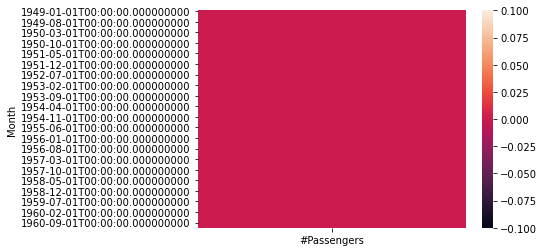

In [7]:
#To check null value
print(df.isnull().sum())

#visualise null values
sns.heatmap(df.isnull())
plt.show()

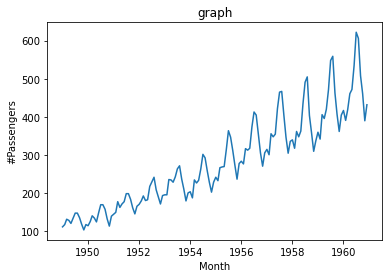

In [8]:
#plot the AirPassenger data 
plt.xlabel("Month")
plt.ylabel("#Passengers")

plt.title("graph")
plt.plot(df["#Passengers"])
plt.show()

In [9]:
#From graph it is seen that, it has trend as well as it has seasonality

In [10]:
#since this data has tread means mean is not a constant means this series
#data is non-stationary so we need to perform Differencing .
difference=df['#Passengers']-df['#Passengers'].shift(1) #first order differencing
difference

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 144, dtype: float64

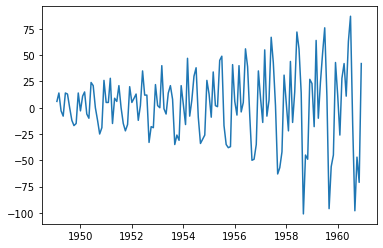

In [11]:
#plot the difference removing null row in it
plt.plot(difference.dropna())
plt.show()

In [12]:
#here trend is removed now but seasonality is present yet

In [13]:
#we are removing seasonality component , then we need perform diffrencing on the
#basis of seasonality . here we have dataset , season=12 month means 
#1 season=12 month 
#perform Seasonal difference means subtract original time series data from
#lag12 means shift(12)
seasonal_difference=df['#Passengers']-df['#Passengers'].shift(12)
seasonal_difference.head(20)

Month
1949-01-01     NaN
1949-02-01     NaN
1949-03-01     NaN
1949-04-01     NaN
1949-05-01     NaN
1949-06-01     NaN
1949-07-01     NaN
1949-08-01     NaN
1949-09-01     NaN
1949-10-01     NaN
1949-11-01     NaN
1949-12-01     NaN
1950-01-01     3.0
1950-02-01     8.0
1950-03-01     9.0
1950-04-01     6.0
1950-05-01     4.0
1950-06-01    14.0
1950-07-01    22.0
1950-08-01    22.0
Name: #Passengers, dtype: float64

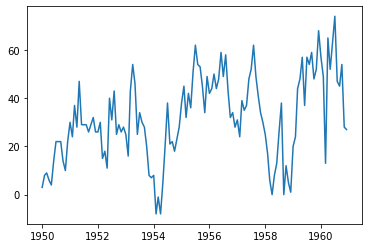

In [14]:
#plot seasonal_difference
plt.plot(seasonal_difference.dropna())
plt.show()

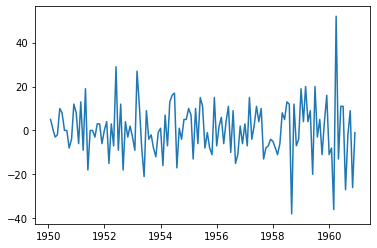

In [15]:
#in above plot , the seasonality component removed . There are some up & downs 
#these are not seasonality , but these are just random error or white noise .
#here Seasonality has been removed but not satisfied still show some trend
#apply first order differencing  , means subtract seasonal_difference from
#lag1 of itself Time series seasonal_difference
double_difference=seasonal_difference-seasonal_difference.shift(1)
#again plot double_difference
plt.plot(double_difference.dropna())
plt.show()

In [16]:
#Now its look much better and much stable we can see there is a constant
#mean . Here the trend has been removed and seasonality has been removed .
#There are some white noise means random error showing. but this looks stationary series.
#This is the concept of differencing which is in the middle of ARIMA that is
#Integration

In [17]:
#Identification of AR(p) ,MA(q) order

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

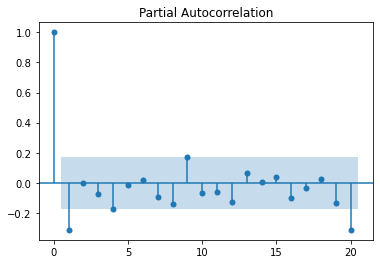

In [19]:
#PACF (partial auto correlation function) for AR(p) order
plot_pacf(double_difference.dropna(),lags=20)
plt.show()

In [20]:
#from PACF plot , order of AR means p=1

In [21]:
#Now we Identity the order of MA(q) : decided on ACF (Auto correlation function)
#plot
from statsmodels.graphics.tsaplots import plot_acf

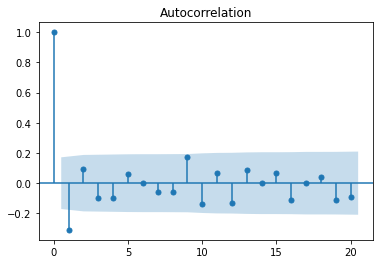

In [22]:
#ACF ( auto correlation function) for MA(q) order
plot_acf(double_difference.dropna(),lags=20)
plt.show()

In [23]:
#from ACF plot , order of MA means q=1

In [24]:
#Here trend along with seasonality is present in Airpassenger data then use SARIMAX

In [25]:
#SARIMAX or Seasonality ARIMAX
#It is a special version of ARIMA 
#call package for SARIMAX 
import statsmodels.api as sm   #sm is a user defined alias name
#api means application programming interface

In [26]:
#create the object SARIMAX CLASS and passing the different arguments
model=sm.tsa.statespace.SARIMAX(df['#Passengers'],order=(1,1,1),
                                seasonal_order=(1,1,1,12),trend='t')
#trend can be either linear or exponential
#if trend is linear then pass 't' in trend parameter otherwise pass 'c' in 
#trend parameter

C:\Users\Hemangi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Hemangi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [27]:
#call fit() for train the model
model=model.fit()

In [28]:
#test the model : use inbuilt method predict()
df['forecast']=model.predict(start=101,end=144) #test on last 30% data

In [29]:
df.tail(20)

,#Passengers,forecast
Month,,
1959-05-01,420,407.697222
1959-06-01,472,485.137734
1959-07-01,548,533.100552
1959-08-01,559,555.228680
1959-09-01,463,461.295770
1959-10-01,407,416.180369
1959-11-01,362,360.239712
1959-12-01,405,388.488965
1960-01-01,417,419.256101


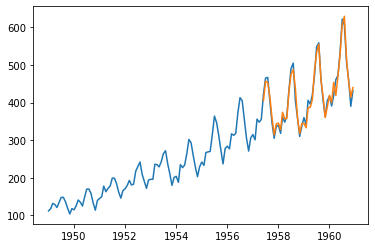

In [30]:
#plot : actual Value and predicted value 
plt.figure()
plt.plot(df[["#Passengers","forecast"]])
plt.show()

In [31]:
#df['Future predict']=model.predict(1,264)

In [32]:
#df.tail(20)

In [33]:
#test the model : use inbuilt method predict()
#model.plot_predict(1,264) 